In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
data=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/movieReplicationSet - Copy.csv")

In [3]:
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


# 8. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model. 

In [4]:
data8=data.iloc[:,0:464]

In [5]:
data8=data8.drop(data8.iloc[:,400:420], axis = 1)

In [6]:
# construct a table with movie ratings and personality factor data
data8

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,5.0,2.0,4.0,5.0,1.0,4.0,5.0,5.0
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0,2.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,3.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,4.0,3.0,2.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,4.0,4.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,3.0,5.0,4.0,2.0,4.0,4.0,5.0


In [7]:
data8.isnull().sum()

The Life of David Gale (2003)                     1021
Wing Commander (1999)                             1026
Django Unchained (2012)                            644
Alien (1979)                                       808
Indiana Jones and the Last Crusade (1989)          634
                                                  ... 
Likes to reflect/play with ideas                    15
Has few artistic interests                          14
Likes to cooperate with others                      15
Is easily distracted                                12
Is sophisticated in art or music or literature      15
Length: 444, dtype: int64

In [57]:
# converting to csv
data8.to_csv('/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/data8.csv')

In [62]:
# dealing with null values
# highlight the null values
#(data8[data8.isnull().T.any() == True]
#.style
#.highlight_null(null_color='skyblue')
#.set_table_attributes('style="font-size: 10px"'))

In [6]:
data8.iloc[:,0:400].isnull().sum()

The Life of David Gale (2003)                1021
Wing Commander (1999)                        1026
Django Unchained (2012)                       644
Alien (1979)                                  808
Indiana Jones and the Last Crusade (1989)     634
                                             ... 
Patton (1970)                                1036
Anaconda (1997)                               899
Twister (1996)                                923
MacArthur (1977)                             1036
Look Who's Talking (1989)                     989
Length: 400, dtype: int64

In [37]:
'''
because of the large number of missing values as well as the missing value amount difference across table indicates
the number of people rating each movie is very different, it's necessary for us to analyze the data specific to each
movie respectively. Hence, we randomly select Alien(1979) as an example to illustrate our analytical process and similar
method as well as model can be employed to predict rating of any other models as the independent factors are the same
whereas the coefficient of final output may be slightly different due to movie type difference.
'''

"\nbecause of the large number of missing values as well as the missing value amount difference across table indicates\nthe number of people rating each movie is very different, it's necessary for us to analyze the data specific to each\nmovie respectively. Hence, we randomly select Alien(1979) as an example to illustrate our analytical process and similar\nmethod as well as model can be employed to predict rating of any other models as the independent factors are the same\nwhereas the coefficient of final output may be slightly different due to movie type difference.\n"

In [7]:
alien=data8.drop(data8.iloc[:,0:3], axis = 1)

In [8]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [73]:
alien

,Alien (1979),Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
0,NaN,1.0,2.0,NaN,4.0,4.0,5.0,2.0,3.0,5.0,...,1.0,1.0,5.0,2.0,4.0,5.0,1.0,4.0,5.0,5.0
1,NaN,2.0,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,...,4.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0,2.0,3.0
2,NaN,4.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,...,2.0,3.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0
3,NaN,5.0,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,...,3.0,3.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
4,NaN,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,...,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,...,4.0,3.0,2.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0
1093,NaN,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,...,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0
1094,NaN,4.0,2.0,5.0,4.0,2.0,5.0,5.0,1.0,2.0,...,4.0,4.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0
1095,NaN,4.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,...,3.0,2.0,2.0,3.0,5.0,4.0,2.0,4.0,4.0,5.0


In [74]:
# converting to csv
alien.to_csv('/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/alien.csv')

Because the missing values here indicate the people who did not rate this movie whereas the number of missing values in other columns are slightly low compared to the overall sample size, here we decide to drop the missing values from the table directly.

In [9]:
alien_new=alien.dropna()

In [10]:
alien_new.isnull().sum()

Alien (1979)                                      0
Is talkative                                      0
Tends to find fault with others                   0
Does a thorough job                               0
Is depressed/Blue                                 0
Is original/comes up with new ideas               0
Is reserved                                       0
Is helpful and unselfish with others              0
Can be somewhat careless                          0
Is relaxed/handles stress well                    0
Is curious about many different things            0
Is full of energy                                 0
Starts quarrels with others                       0
Is a reliable worker                              0
Can be tense                                      0
Is ingenious/a deep thinker                       0
Generates a lot of Enthusiasm                     0
Has a forgiving nature                            0
Tends to be disorganized                          0
Worries a lo

In [11]:
alien_new

,Alien (1979),Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
5,2.5,1.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,...,2.0,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,4.0
7,2.5,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,...,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0
9,3.0,5.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,5.0,...,1.0,4.0,4.0,5.0,3.0,4.0,2.0,4.0,4.0,4.0
11,0.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,5.0,4.0,...,2.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,5.0,4.0
22,3.0,2.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,2.0,...,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,...,5.0,4.0,3.0,5.0,5.0,5.0,2.0,5.0,4.0,2.0
1078,3.0,2.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,2.0,...,2.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0
1085,3.5,3.0,4.0,5.0,4.0,2.0,3.0,4.0,4.0,1.0,...,4.0,4.0,3.0,2.0,5.0,3.0,4.0,5.0,4.0,2.0
1086,2.5,5.0,4.0,5.0,1.0,4.0,2.0,5.0,4.0,3.0,...,2.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,5.0,3.0


null values all dropped

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faba603ead0>],
      dtype=object)

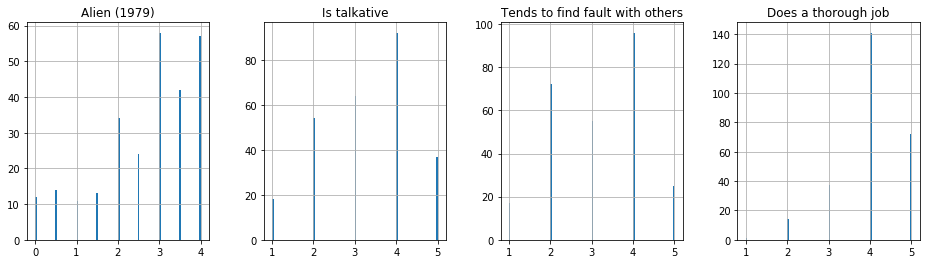

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
# pd.DataFrame.hist(df, column='total_rooms', bins = 100)
# pd.DataFrame.hist(df, column='total_bedrooms', bins = 100)
alien_new.hist(column = alien_new.columns[0], ax=ax[0], bins = 100)
alien_new.hist(column = alien_new.columns[1], ax=ax[1], bins = 100)
alien_new.hist(column = alien_new.columns[2], ax=ax[2], bins = 100)
alien_new.hist(column = alien_new.columns[3], ax=ax[3], bins = 100)

we found that because almost all the data are within the range of 1-5 and 0-4, there's no necessity to normalize or standardize them without skewed pattern. In addition, there's also no outliers to deal with, which means that the current data is relatively clean.

In [13]:
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X = alien_new.iloc[:, 1:].values
y = alien_new.iloc[:, 0].values

In [14]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [15]:
rmse_list

[1.4143701406774178,
 1.5967739085752044,
 1.0377743092504728,
 1.125778137350256,
 1.2873023772359131,
 1.2370148954635247,
 1.421549808938635,
 1.0223593949971634,
 1.3584118252050204,
 1.4735845196964295]

In [16]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

1.3291426738379353

In [17]:
min_max = preprocessing.MinMaxScaler()
alien2 = min_max.fit_transform(alien_new.values)

In [18]:
alien_final = pd.DataFrame(alien2,columns=alien.columns)

In [98]:
alien_final

,Alien (1979),Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
0,0.625,0.00,0.50,0.50,0.75,0.50,0.75,0.50,0.75,0.25,...,0.25,0.00,0.25,0.25,1.00,0.00,0.00,0.25,0.75,0.75
1,0.625,0.75,0.75,0.75,0.75,0.50,0.50,0.50,0.75,0.50,...,0.50,0.75,0.75,0.50,0.75,0.75,0.25,0.75,0.75,0.75
2,0.750,1.00,0.75,1.00,0.25,1.00,0.50,0.75,0.75,1.00,...,0.00,0.75,0.75,1.00,0.50,0.75,0.25,0.75,0.75,0.75
3,0.000,0.75,0.75,0.75,0.50,0.50,1.00,0.75,1.00,0.75,...,0.25,0.75,0.75,0.25,0.75,0.75,0.00,0.75,1.00,0.75
4,0.750,0.25,0.75,0.75,0.75,0.50,0.50,0.75,0.25,0.25,...,0.50,0.50,0.50,0.75,0.75,0.75,0.50,0.25,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1.000,1.00,0.75,1.00,1.00,0.50,0.75,0.50,0.75,0.75,...,1.00,0.75,0.50,1.00,1.00,1.00,0.25,1.00,0.75,0.25
261,0.750,0.25,0.50,0.75,0.75,0.75,0.75,1.00,0.50,0.25,...,0.25,0.25,0.25,0.50,0.25,0.75,0.25,0.75,0.75,0.75
262,0.875,0.50,0.75,1.00,0.75,0.25,0.50,0.75,0.75,0.00,...,0.75,0.75,0.50,0.25,1.00,0.50,0.75,1.00,0.75,0.25
263,0.625,1.00,0.75,1.00,0.00,0.75,0.25,1.00,0.75,0.50,...,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,1.00,0.50


In [19]:
# Second trial: linear regression after normalization
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X1 = alien_final.iloc[:, 1:].values
y1 = alien_final.iloc[:, 0].values

In [20]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X1):
    X_train, X_test, y_train, y_test = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [21]:
rmse_list

[0.3535925351693544,
 0.39919347714380105,
 0.2594435773126182,
 0.28144453433756406,
 0.3218255943089783,
 0.3092537238658812,
 0.3553874522346586,
 0.25558984874929086,
 0.3396029563012552,
 0.3683961299241074]

In [29]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()
#model = LinearRegression().fit(X1,y1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.3322856684594839

In [23]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.30433036217180603

In [24]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = RandomForestRegressor(n_estimators=100)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X1):
    X_train, X_test, y_train, y_test = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [25]:
rmse_list

[0.31896688336751383,
 0.3290843778999206,
 0.24616491291784834,
 0.2816652284644413,
 0.3014851356817398,
 0.3172918192416759,
 0.313444150650356,
 0.26849081867270336,
 0.27258279881815445,
 0.349943161593642]

In [26]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X1, y1)

In [112]:
model.coef_

array([ 0.05254506,  0.02752971,  0.02683409,  0.0431758 , -0.19457572,
        0.13141166,  0.05063148,  0.02713093, -0.03550302,  0.04409538,
        0.0297169 , -0.05733969, -0.24453649,  0.02480682, -0.01040459,
        0.05855868,  0.01915112,  0.09097679,  0.01756306,  0.19920487,
       -0.04485854,  0.02274673, -0.0412765 , -0.01027286,  0.11043178,
       -0.03833372,  0.09966402,  0.16529509, -0.03979509,  0.00975867,
       -0.05969135, -0.01355481, -0.05515363, -0.00958405, -0.05667605,
       -0.17514003, -0.01766202,  0.15336929, -0.03081015,  0.01598983,
       -0.07111857, -0.00326063, -0.13104265,  0.00539892])

In [113]:
model.intercept_

0.6002657546133991

In [114]:
model.score(X1, y1)

0.1378719972171718

In [32]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X1,y1)
rSqr = model.score(X1,y1)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.1378719972171718


In [38]:
model.coef_

array([ 0.05254506,  0.02752971,  0.02683409,  0.0431758 , -0.19457572,
        0.13141166,  0.05063148,  0.02713093, -0.03550302,  0.04409538,
        0.0297169 , -0.05733969, -0.24453649,  0.02480682, -0.01040459,
        0.05855868,  0.01915112,  0.09097679,  0.01756306,  0.19920487,
       -0.04485854,  0.02274673, -0.0412765 , -0.01027286,  0.11043178,
       -0.03833372,  0.09966402,  0.16529509, -0.03979509,  0.00975867,
       -0.05969135, -0.01355481, -0.05515363, -0.00958405, -0.05667605,
       -0.17514003, -0.01766202,  0.15336929, -0.03081015,  0.01598983,
       -0.07111857, -0.00326063, -0.13104265,  0.00539892])

In [33]:
yHat=b0
for i in range(44):
    yHat+=b1[i]*alien_final.iloc[:,1+i]

In [40]:
model.intercept_

0.6002657546133991

In [39]:
model.coef_

array([ 0.05254506,  0.02752971,  0.02683409,  0.0431758 , -0.19457572,
        0.13141166,  0.05063148,  0.02713093, -0.03550302,  0.04409538,
        0.0297169 , -0.05733969, -0.24453649,  0.02480682, -0.01040459,
        0.05855868,  0.01915112,  0.09097679,  0.01756306,  0.19920487,
       -0.04485854,  0.02274673, -0.0412765 , -0.01027286,  0.11043178,
       -0.03833372,  0.09966402,  0.16529509, -0.03979509,  0.00975867,
       -0.05969135, -0.01355481, -0.05515363, -0.00958405, -0.05667605,
       -0.17514003, -0.01766202,  0.15336929, -0.03081015,  0.01598983,
       -0.07111857, -0.00326063, -0.13104265,  0.00539892])

Text(0.5, 1.0, 'R^2 = 0.138')

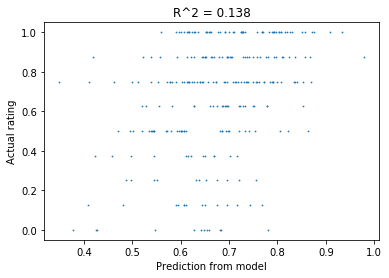

In [36]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_final.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [41]:
def movie_lr(a):
    table=data8.drop(data8.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [42]:
def movie_rf(a):
    table=data8.drop(data8.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [45]:
# Method-1
 
# Import pandas module
import pandas as pd 
 
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df1 = pd.DataFrame(columns =data8.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE'])


In [48]:
for i in range(400):
    df1.iloc[0,i]=movie_lr(i)
    #df1.iloc[1,i]=movie_rf(i)
    

In [49]:
df1

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.792583,0.855711,0.243083,0.332286,0.241984,0.325365,0.30754,0.280153,0.360817,0.256503,...,0.240044,0.329156,0.298857,0.283221,0.221785,324766926195.651306,0.326182,0.345704,476243017057.114624,0.381072
RF RMSE,0.303255,0.30533,0.230446,0.304678,0.233259,0.258233,0.260818,0.273732,0.279556,0.248242,...,0.226518,0.24798,0.277638,0.265104,NaN,NaN,NaN,NaN,NaN,NaN


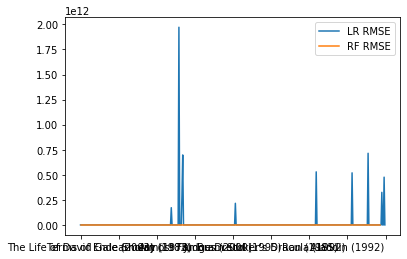

In [105]:
df1.T.plot()

# 9. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [51]:
data9=data.iloc[:,0:477]

In [52]:
data9=data9.drop(data9.iloc[:,400:474], axis = 1)

In [53]:
data9

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,0.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.5,NaN,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,3.5,3.5,4.0,3.5,4.0,4.0,4.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1


In [54]:
data9.isnull().sum()

The Life of David Gale (2003)                                         1021
Wing Commander (1999)                                                 1026
Django Unchained (2012)                                                644
Alien (1979)                                                           808
Indiana Jones and the Last Crusade (1989)                              634
                                                                      ... 
MacArthur (1977)                                                      1036
Look Who's Talking (1989)                                              989
Gender identity (1 = female; 2 = male; 3 = self-described)              24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)              0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)       0
Length: 403, dtype: int64

In [55]:
alien=data9.drop(data9.iloc[:,0:3], axis = 1)

In [56]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [57]:
alien

,Alien (1979),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,1.0,0,1
1,NaN,1.0,0,0
2,NaN,1.0,1,0
3,NaN,1.0,0,1
4,NaN,1.0,1,1
...,...,...,...,...
1092,NaN,1.0,0,0
1093,NaN,1.0,0,0
1094,NaN,1.0,0,0
1095,NaN,1.0,0,1


In [58]:
alien.isnull().sum()

Alien (1979)                                                          808
Gender identity (1 = female; 2 = male; 3 = self-described)             24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)             0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)      0
dtype: int64

In [59]:
alien_new=alien.dropna()

In [62]:
min_max = preprocessing.MinMaxScaler()
alien2 = min_max.fit_transform(alien_new.values)

In [63]:
alien_final = pd.DataFrame(alien2,columns=alien.columns)

In [64]:
# Second trial: linear regression after normalization
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X1 = alien_final.iloc[:, 1:].values
y1 = alien_final.iloc[:, 0].values

In [65]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()
#model = LinearRegression().fit(X1,y1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.2832752824046137

In [66]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.2879121187305152

In [67]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X1,y1)
rSqr = model.score(X1,y1)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.06753211924714242


In [68]:
yHat=b0
for i in range(3):
    yHat+=b1[i]*alien_final.iloc[:,1+i]

In [69]:
model.intercept_

0.5882027153472149

In [70]:
model.coef_

array([ 0.26721041, -0.0908102 ,  0.10609582])

Text(0.5, 1.0, 'R^2 = 0.068')

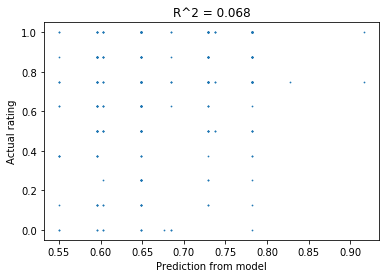

In [71]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_final.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [72]:
def movie_lr(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [73]:
def movie_rf(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [74]:
# Method-1
 
# Import pandas module
import pandas as pd 
 
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df2 = pd.DataFrame(columns =data9.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE'])

In [76]:
for i in range(400):
    df2.iloc[0,i]=movie_lr(i)
    df2.iloc[1,i]=movie_rf(i)
    

In [77]:
df2

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.296451,0.297311,0.226195,0.283275,0.224407,0.264346,0.262635,0.266974,0.27006,0.24256,...,0.228804,0.252599,0.276803,0.262099,0.216985,0.29905,0.294755,0.251961,0.301586,0.288096
RF RMSE,0.292925,0.314518,0.227576,0.287558,0.22547,0.26587,0.277258,0.271316,0.272527,0.244567,...,0.233103,0.25555,0.27718,0.266047,0.218176,0.299626,0.301303,0.253148,0.335329,0.287597


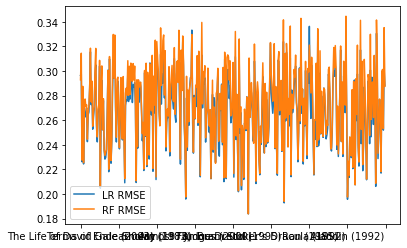

In [100]:
df2.T.plot()

In [102]:
d=df2.T

In [103]:
np.mean(d['LR RMSE'])

0.26786709517678886

In [104]:
np.mean(d['RF RMSE'])

0.2737578244585003

# 10. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401-477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [78]:
data10=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/movieReplicationSet - Copy.csv")

In [79]:
alien=data10.drop(data10.iloc[:,0:3], axis = 1)

In [80]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [81]:
alien

,Alien (1979),I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,NaN,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [82]:
alien.isnull().sum()

Alien (1979)                                                               808
I enjoy driving fast                                                         3
I enjoy rollercoasters                                                       4
Have you ever bungee-jumped?                                                 5
I enjoy impulse shopping                                                     6
                                                                          ... 
Movies change my position on social economic or political issues            20
When watching movies things get so intense that I have to stop watching     18
Gender identity (1 = female; 2 = male; 3 = self-described)                  24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                  0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)           0
Length: 78, dtype: int64

In [83]:
alien_new=alien.dropna()

In [84]:
min_max = preprocessing.MinMaxScaler()
alien2 = min_max.fit_transform(alien_new.values)
alien_final = pd.DataFrame(alien2,columns=alien.columns)

In [85]:
# Second trial: linear regression after normalization
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X1 = alien_final.iloc[:, 1:].values
y1 = alien_final.iloc[:, 0].values

In [86]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()
#model = LinearRegression().fit(X1,y1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.3732498096226423

In [87]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.2883613618361517

In [88]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X1,y1)
rSqr = model.score(X1,y1)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.34763579527087696


In [90]:
yHat=b0
for i in range(77):
    yHat+=b1[i]*alien_final.iloc[:,1+i]

In [91]:
model.intercept_

0.7607977744047336

In [92]:
model.coef_

array([-0.1046803 , -0.00477752, -0.08763566, -0.03217319, -0.06304865,
       -0.19969134,  0.03138322,  0.07173105,  0.02718868,  0.18701481,
       -0.16102212,  0.06311525, -0.14267469, -0.05718013, -0.06492934,
       -0.17448882, -0.05490482,  0.01753534,  0.02029252,  0.2277124 ,
        0.10101756, -0.01444492,  0.03402509,  0.06909628, -0.16896001,
        0.13689862, -0.05478472,  0.11159318, -0.03637476, -0.07005558,
       -0.0076655 , -0.06564749, -0.14026064, -0.07359242, -0.00854371,
        0.06521279,  0.06583096,  0.12416684,  0.01475914,  0.21071527,
       -0.03427215, -0.00379684, -0.054788  ,  0.04485387,  0.08886591,
        0.03084182,  0.02896221,  0.13418586,  0.02444952, -0.03135701,
       -0.1452388 ,  0.04795917,  0.00416459, -0.04999358, -0.12419954,
       -0.150011  , -0.02997827,  0.07053173,  0.05514104,  0.01548793,
       -0.01567262, -0.09882559, -0.12912935,  0.0659877 , -0.04176602,
       -0.00920909,  0.12524902, -0.02885398,  0.03133175, -0.02

Text(0.5, 1.0, 'R^2 = 0.348')

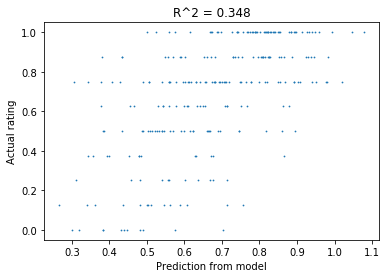

In [93]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_final.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

In [94]:
def movie_lr(a):
    table=data10.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [95]:
def movie_rf(a):
    table=data9.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    min_max = preprocessing.MinMaxScaler()
    table2 = min_max.fit_transform(table_new.values)
    table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_final.iloc[:, 1:].values
    y1 = table_final.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [96]:
# Method-1
 
# Import pandas module
import pandas as pd 
 
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df3 = pd.DataFrame(columns =data10.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE'])

In [97]:
for i in range(400):
    df3.iloc[0,i]=movie_lr(i)
    df3.iloc[1,i]=movie_rf(i)
    

In [98]:
df3

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.547174,0.499161,0.266627,0.37325,0.256565,0.701473,0.405889,0.343725,0.578952,0.261215,...,0.251542,0.369144,0.322065,0.278254,0.225611,0.377852,0.450751,0.4245,0.401092,1.060501
RF RMSE,0.294655,0.31441,0.227479,0.287999,0.225384,0.265082,0.276503,0.27106,0.273496,0.244392,...,0.233165,0.255778,0.277245,0.265758,0.217925,0.300822,0.301199,0.253066,0.328771,0.286827


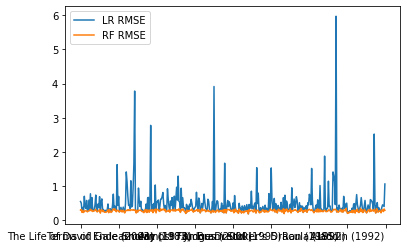

In [99]:
df3.T.plot()